In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Interpolation/CYBR/InterpolatedDenWeekCYBR.csv')

In [3]:
df

,DATES,D Revenue,U CR,D OE,U NOI,U CAPEX,U WK,D FCF
0,2017-10-01,8439.018762,1641.728851,4706.103286,955.523190,851.150222,18438.399580,5414.357685
1,2017-10-08,8425.869005,1620.059632,4928.968969,962.910886,849.591072,18369.284487,5425.609529
2,2017-10-15,8412.719248,1598.390413,5151.834651,970.298582,848.031923,18300.169395,5436.861372
3,2017-10-22,8399.569491,1576.721195,5374.700333,977.686277,846.472773,18231.054302,5448.113216
4,2017-10-29,8386.419734,1555.051976,5597.566015,985.073973,844.913624,18161.939210,5459.365059
...,...,...,...,...,...,...,...,...
114,2019-12-08,10180.088508,2080.111870,8404.822577,457.684761,531.658926,304849.741261,4018.279154
115,2019-12-15,10210.458951,2068.226637,8465.625422,470.743366,529.551532,309754.490424,3856.947273
116,2019-12-22,10240.829394,2056.341404,8526.428266,483.801971,527.444138,314659.239588,3695.615392
117,2019-12-29,10271.199838,2044.456171,8587.231110,496.860576,525.336744,319563.988751,3534.283511


In [4]:
df["D FCF"].mean()

5227.419365101186

In [5]:
dataset = df.values

In [6]:
dataset

array([['2017-10-01', 8439.01876207577, 1641.7288506472698,
        4706.1032864629215, 955.523190020351, 851.150221758768,
        18438.3995800267, 5414.35768516055],
       ['2017-10-08', 8425.869005046152, 1620.059632043193,
        4928.968968524083, 962.9108858206264, 849.5910723253828,
        18369.28448742029, 5425.609528707469],
       ['2017-10-15', 8412.719248016532, 1598.390413439116,
        5151.834650585245, 970.2985816209016, 848.0319228919979,
        18300.16939481387, 5436.861372254386],
       ['2017-10-22', 8399.569490986914, 1576.7211948350393,
        5374.700332646406, 977.6862774211768, 846.4727734586128,
        18231.054302207456, 5448.113215801303],
       ['2017-10-29', 8386.419733957297, 1555.0519762309618,
        5597.5660147075705, 985.0739732214522, 844.9136240252278,
        18161.93920960104, 5459.365059348221],
       ['2017-11-05', 8373.269976927677, 1533.3827576268855,
        5820.431696768732, 992.4616690217276, 843.3544745918426,
        18092

In [7]:
X = dataset[:,1:7]
Y = dataset[:,7]

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [9]:
X_scale

array([[1.93238510e-01, 4.56937295e-01, 0.00000000e+00, 8.55664876e-01,
        1.00000000e+00, 2.92737633e-03],
       [1.87542712e-01, 4.35358965e-01, 5.65371897e-02, 8.64692404e-01,
        9.95245349e-01, 2.70219353e-03],
       [1.81846913e-01, 4.13780636e-01, 1.13074379e-01, 8.73719931e-01,
        9.90490697e-01, 2.47701074e-03],
       [1.76151115e-01, 3.92202307e-01, 1.69611569e-01, 8.82747459e-01,
        9.85736046e-01, 2.25182794e-03],
       [1.70455317e-01, 3.70623977e-01, 2.26148759e-01, 8.91774986e-01,
        9.80981394e-01, 2.02664515e-03],
       [1.64759519e-01, 3.49045648e-01, 2.82685949e-01, 9.00802514e-01,
        9.76226743e-01, 1.80146235e-03],
       [1.59063721e-01, 3.27467318e-01, 3.39223138e-01, 9.09830041e-01,
        9.71472092e-01, 1.57627956e-03],
       [1.53367922e-01, 3.05888989e-01, 3.95760328e-01, 9.18857569e-01,
        9.66717440e-01, 1.35109677e-03],
       [1.47672124e-01, 2.84310659e-01, 4.52297518e-01, 9.27885096e-01,
        9.61962789e-01, 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(95, 6) (12, 6) (12, 6) (95,) (12,) (12,)


In [12]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [13]:
model = Sequential([
    Dense(6, activation='elu', input_shape=(6,)),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(1, activation='elu'),
])

In [14]:
model.compile(optimizer='rmsprop',
              loss='mean_absolute_error')

In [15]:
hist = model.fit(X_train, Y_train,
          batch_size=2, epochs=1500,
          validation_data=(X_val, Y_val))

Train on 95 samples, validate on 12 samples
Epoch 1/1500
95/95 [==============================] - 1s 11ms/step - loss: 4872.8002 - val_loss: 3188.9871
Epoch 2/1500
95/95 [==============================] - 0s 3ms/step - loss: 1088.2508 - val_loss: 1000.3866
Epoch 3/1500
95/95 [==============================] - 0s 4ms/step - loss: 673.9863 - val_loss: 626.2268
Epoch 4/1500
95/95 [==============================] - 0s 4ms/step - loss: 572.5823 - val_loss: 460.9655
Epoch 5/1500
95/95 [==============================] - 0s 3ms/step - loss: 500.1168 - val_loss: 561.0666
Epoch 6/1500
95/95 [==============================] - 0s 3ms/step - loss: 446.2613 - val_loss: 495.6506
Epoch 7/1500
95/95 [==============================] - 0s 3ms/step - loss: 418.3831 - val_loss: 427.4614
Epoch 8/1500
95/95 [==============================] - 0s 2ms/step - loss: 406.2566 - val_loss: 481.6548
Epoch 9/1500
95/95 [==============================] - 0s 2ms/step - loss: 397.2806 - val_loss: 423.8697
Epoch 10/1500
9

95/95 [==============================] - 0s 3ms/step - loss: 138.3633 - val_loss: 213.8309
Epoch 79/1500
95/95 [==============================] - 0s 3ms/step - loss: 152.7868 - val_loss: 202.9866
Epoch 80/1500
95/95 [==============================] - 0s 4ms/step - loss: 139.8933 - val_loss: 259.4875
Epoch 81/1500
95/95 [==============================] - 0s 3ms/step - loss: 158.9531 - val_loss: 142.1779
Epoch 82/1500
95/95 [==============================] - 0s 3ms/step - loss: 155.4449 - val_loss: 279.4775
Epoch 83/1500
95/95 [==============================] - 0s 3ms/step - loss: 151.8616 - val_loss: 204.1449
Epoch 84/1500
95/95 [==============================] - 0s 3ms/step - loss: 148.8114 - val_loss: 57.8408
Epoch 85/1500
95/95 [==============================] - 0s 4ms/step - loss: 149.2399 - val_loss: 310.9860
Epoch 86/1500
95/95 [==============================] - 0s 3ms/step - loss: 146.8421 - val_loss: 206.8067
Epoch 87/1500
95/95 [==============================] - 0s 3ms/step - l

Epoch 156/1500
95/95 [==============================] - 0s 3ms/step - loss: 128.9625 - val_loss: 50.6882
Epoch 157/1500
95/95 [==============================] - 0s 3ms/step - loss: 131.1172 - val_loss: 240.6897
Epoch 158/1500
95/95 [==============================] - 0s 4ms/step - loss: 127.7587 - val_loss: 36.7977
Epoch 159/1500
95/95 [==============================] - 0s 4ms/step - loss: 126.0819 - val_loss: 175.4444
Epoch 160/1500
95/95 [==============================] - 0s 4ms/step - loss: 129.1103 - val_loss: 24.5785
Epoch 161/1500
95/95 [==============================] - 0s 3ms/step - loss: 126.8526 - val_loss: 162.3620
Epoch 162/1500
95/95 [==============================] - 0s 3ms/step - loss: 132.6340 - val_loss: 312.8462
Epoch 163/1500
95/95 [==============================] - 0s 3ms/step - loss: 143.2924 - val_loss: 47.3376
Epoch 164/1500
95/95 [==============================] - 0s 3ms/step - loss: 144.3816 - val_loss: 234.0838
Epoch 165/1500
95/95 [============================

95/95 [==============================] - 0s 3ms/step - loss: 136.9187 - val_loss: 141.4869
Epoch 234/1500
95/95 [==============================] - 0s 3ms/step - loss: 124.8897 - val_loss: 237.4618
Epoch 235/1500
95/95 [==============================] - 0s 3ms/step - loss: 125.0544 - val_loss: 338.7070
Epoch 236/1500
95/95 [==============================] - 0s 4ms/step - loss: 120.8254 - val_loss: 68.3844
Epoch 237/1500
95/95 [==============================] - 0s 5ms/step - loss: 131.5082 - val_loss: 56.9967
Epoch 238/1500
95/95 [==============================] - 0s 4ms/step - loss: 133.3356 - val_loss: 111.5267
Epoch 239/1500
95/95 [==============================] - 0s 3ms/step - loss: 123.3713 - val_loss: 48.1085
Epoch 240/1500
95/95 [==============================] - 0s 3ms/step - loss: 124.5659 - val_loss: 166.0617
Epoch 241/1500
95/95 [==============================] - 0s 2ms/step - loss: 114.2605 - val_loss: 154.3726
Epoch 242/1500
95/95 [==============================] - 0s 5ms/s

95/95 [==============================] - 0s 2ms/step - loss: 112.1107 - val_loss: 55.9229
Epoch 311/1500
95/95 [==============================] - 0s 2ms/step - loss: 118.9288 - val_loss: 370.3892
Epoch 312/1500
95/95 [==============================] - 0s 2ms/step - loss: 120.2788 - val_loss: 191.0636
Epoch 313/1500
95/95 [==============================] - 0s 3ms/step - loss: 116.1451 - val_loss: 110.6991
Epoch 314/1500
95/95 [==============================] - 0s 3ms/step - loss: 133.2706 - val_loss: 158.0121
Epoch 315/1500
95/95 [==============================] - 0s 3ms/step - loss: 118.8345 - val_loss: 88.9296
Epoch 316/1500
95/95 [==============================] - 0s 5ms/step - loss: 112.8290 - val_loss: 219.1153
Epoch 317/1500
95/95 [==============================] - 0s 3ms/step - loss: 116.9783 - val_loss: 117.2233
Epoch 318/1500
95/95 [==============================] - 0s 4ms/step - loss: 117.7258 - val_loss: 146.5366
Epoch 319/1500
95/95 [==============================] - 0s 3ms/

95/95 [==============================] - 0s 4ms/step - loss: 118.3317 - val_loss: 182.4641
Epoch 388/1500
95/95 [==============================] - 0s 3ms/step - loss: 115.1945 - val_loss: 118.2983
Epoch 389/1500
95/95 [==============================] - 0s 3ms/step - loss: 104.4163 - val_loss: 50.4178
Epoch 390/1500
95/95 [==============================] - 0s 4ms/step - loss: 107.0654 - val_loss: 284.2245
Epoch 391/1500
95/95 [==============================] - 0s 5ms/step - loss: 105.5731 - val_loss: 198.8218
Epoch 392/1500
95/95 [==============================] - 0s 5ms/step - loss: 102.5952 - val_loss: 73.9128
Epoch 393/1500
95/95 [==============================] - 0s 4ms/step - loss: 112.9925 - val_loss: 171.5446
Epoch 394/1500
95/95 [==============================] - 0s 3ms/step - loss: 107.7814 - val_loss: 238.6777
Epoch 395/1500
95/95 [==============================] - 0s 3ms/step - loss: 117.6058 - val_loss: 47.7999
Epoch 396/1500
95/95 [==============================] - 0s 3ms/s

95/95 [==============================] - 0s 3ms/step - loss: 99.7041 - val_loss: 46.3597
Epoch 465/1500
95/95 [==============================] - 0s 3ms/step - loss: 98.1323 - val_loss: 123.2634
Epoch 466/1500
95/95 [==============================] - 0s 3ms/step - loss: 102.6116 - val_loss: 163.2008
Epoch 467/1500
95/95 [==============================] - 0s 2ms/step - loss: 100.8544 - val_loss: 316.4067
Epoch 468/1500
95/95 [==============================] - 0s 3ms/step - loss: 104.0914 - val_loss: 61.3228
Epoch 469/1500
95/95 [==============================] - 0s 3ms/step - loss: 106.4293 - val_loss: 166.0572
Epoch 470/1500
95/95 [==============================] - 0s 2ms/step - loss: 105.8720 - val_loss: 218.5304
Epoch 471/1500
95/95 [==============================] - 0s 3ms/step - loss: 100.2082 - val_loss: 133.7691
Epoch 472/1500
95/95 [==============================] - 0s 3ms/step - loss: 106.8032 - val_loss: 135.0507
Epoch 473/1500
95/95 [==============================] - 0s 3ms/st

95/95 [==============================] - 0s 2ms/step - loss: 88.2142 - val_loss: 103.3770
Epoch 543/1500
95/95 [==============================] - 0s 3ms/step - loss: 98.1498 - val_loss: 67.3132
Epoch 544/1500
95/95 [==============================] - 0s 3ms/step - loss: 96.4610 - val_loss: 226.6436
Epoch 545/1500
95/95 [==============================] - 0s 3ms/step - loss: 97.9966 - val_loss: 65.6928
Epoch 546/1500
95/95 [==============================] - 0s 3ms/step - loss: 95.1712 - val_loss: 63.2571
Epoch 547/1500
95/95 [==============================] - 0s 3ms/step - loss: 92.7955 - val_loss: 179.2445
Epoch 548/1500
95/95 [==============================] - 0s 3ms/step - loss: 95.6545 - val_loss: 59.5109
Epoch 549/1500
95/95 [==============================] - 0s 5ms/step - loss: 95.6098 - val_loss: 27.0005
Epoch 550/1500
95/95 [==============================] - 0s 4ms/step - loss: 89.2563 - val_loss: 220.8313
Epoch 551/1500
95/95 [==============================] - 0s 4ms/step - loss:

Epoch 620/1500
95/95 [==============================] - 0s 4ms/step - loss: 82.8289 - val_loss: 210.4017
Epoch 621/1500
95/95 [==============================] - 0s 4ms/step - loss: 92.1219 - val_loss: 144.6274
Epoch 622/1500
95/95 [==============================] - 0s 4ms/step - loss: 86.0128 - val_loss: 226.4282
Epoch 623/1500
95/95 [==============================] - 0s 4ms/step - loss: 92.3373 - val_loss: 116.0828
Epoch 624/1500
95/95 [==============================] - 0s 2ms/step - loss: 100.5669 - val_loss: 24.4372
Epoch 625/1500
95/95 [==============================] - 0s 3ms/step - loss: 87.9165 - val_loss: 97.0861
Epoch 626/1500
95/95 [==============================] - 0s 2ms/step - loss: 88.4817 - val_loss: 35.0853
Epoch 627/1500
95/95 [==============================] - 0s 3ms/step - loss: 88.2787 - val_loss: 64.2630
Epoch 628/1500
95/95 [==============================] - 0s 3ms/step - loss: 87.1468 - val_loss: 161.6282
Epoch 629/1500
95/95 [==============================] - 0s

95/95 [==============================] - 0s 4ms/step - loss: 90.0584 - val_loss: 21.4161
Epoch 699/1500
95/95 [==============================] - 0s 3ms/step - loss: 79.5501 - val_loss: 92.1507
Epoch 700/1500
95/95 [==============================] - 0s 3ms/step - loss: 79.5973 - val_loss: 185.0538
Epoch 701/1500
95/95 [==============================] - 0s 3ms/step - loss: 87.0885 - val_loss: 60.3744
Epoch 702/1500
95/95 [==============================] - 0s 3ms/step - loss: 84.8087 - val_loss: 57.0706
Epoch 703/1500
95/95 [==============================] - 0s 3ms/step - loss: 79.3734 - val_loss: 38.4908
Epoch 704/1500
95/95 [==============================] - 0s 3ms/step - loss: 75.2184 - val_loss: 190.7057
Epoch 705/1500
95/95 [==============================] - 0s 3ms/step - loss: 90.1868 - val_loss: 37.2525
Epoch 706/1500
95/95 [==============================] - 0s 3ms/step - loss: 80.6939 - val_loss: 115.2412
Epoch 707/1500
95/95 [==============================] - 0s 3ms/step - loss: 

95/95 [==============================] - 0s 3ms/step - loss: 82.0977 - val_loss: 102.9138
Epoch 777/1500
95/95 [==============================] - 0s 3ms/step - loss: 83.3413 - val_loss: 44.8627
Epoch 778/1500
95/95 [==============================] - 0s 3ms/step - loss: 76.8978 - val_loss: 77.1837
Epoch 779/1500
95/95 [==============================] - 0s 3ms/step - loss: 77.3460 - val_loss: 179.8917
Epoch 780/1500
95/95 [==============================] - 0s 4ms/step - loss: 83.5769 - val_loss: 66.8005
Epoch 781/1500
95/95 [==============================] - 0s 3ms/step - loss: 61.4737 - val_loss: 138.5940
Epoch 782/1500
95/95 [==============================] - 0s 3ms/step - loss: 80.7305 - val_loss: 73.2028
Epoch 783/1500
95/95 [==============================] - 0s 3ms/step - loss: 82.0736 - val_loss: 79.7040
Epoch 784/1500
95/95 [==============================] - 0s 3ms/step - loss: 80.6639 - val_loss: 182.9262
Epoch 785/1500
95/95 [==============================] - 0s 4ms/step - loss:

95/95 [==============================] - 0s 3ms/step - loss: 78.4448 - val_loss: 152.4494
Epoch 855/1500
95/95 [==============================] - 0s 3ms/step - loss: 77.9929 - val_loss: 70.9539
Epoch 856/1500
95/95 [==============================] - 0s 3ms/step - loss: 70.1266 - val_loss: 181.6533
Epoch 857/1500
95/95 [==============================] - 0s 3ms/step - loss: 76.0437 - val_loss: 55.7251
Epoch 858/1500
95/95 [==============================] - 0s 3ms/step - loss: 71.5084 - val_loss: 41.9414
Epoch 859/1500
95/95 [==============================] - 0s 3ms/step - loss: 79.2180 - val_loss: 27.3179
Epoch 860/1500
95/95 [==============================] - 0s 4ms/step - loss: 76.2091 - val_loss: 121.1434
Epoch 861/1500
95/95 [==============================] - 0s 4ms/step - loss: 79.5042 - val_loss: 19.4002
Epoch 862/1500
95/95 [==============================] - 0s 4ms/step - loss: 72.5518 - val_loss: 180.6169
Epoch 863/1500
95/95 [==============================] - ETA: 0s - loss: 75.

95/95 [==============================] - 0s 3ms/step - loss: 73.1886 - val_loss: 31.3712
Epoch 933/1500
95/95 [==============================] - 0s 3ms/step - loss: 71.9963 - val_loss: 80.1647
Epoch 934/1500
95/95 [==============================] - 0s 3ms/step - loss: 70.9013 - val_loss: 38.1533
Epoch 935/1500
95/95 [==============================] - 0s 4ms/step - loss: 74.8417 - val_loss: 176.0995
Epoch 936/1500
95/95 [==============================] - 0s 3ms/step - loss: 74.6935 - val_loss: 153.8114
Epoch 937/1500
95/95 [==============================] - 0s 3ms/step - loss: 69.9593 - val_loss: 170.0944
Epoch 938/1500
95/95 [==============================] - 0s 3ms/step - loss: 72.8415 - val_loss: 93.7112
Epoch 939/1500
95/95 [==============================] - 0s 3ms/step - loss: 72.5057 - val_loss: 129.1622
Epoch 940/1500
95/95 [==============================] - 0s 3ms/step - loss: 74.5954 - val_loss: 89.8579
Epoch 941/1500
95/95 [==============================] - 0s 3ms/step - loss:

95/95 [==============================] - 0s 3ms/step - loss: 62.1603 - val_loss: 86.4945
Epoch 1011/1500
95/95 [==============================] - 0s 3ms/step - loss: 68.9901 - val_loss: 92.6575
Epoch 1012/1500
95/95 [==============================] - 0s 3ms/step - loss: 73.6870 - val_loss: 24.5242
Epoch 1013/1500
95/95 [==============================] - 0s 3ms/step - loss: 69.0881 - val_loss: 100.4239
Epoch 1014/1500
95/95 [==============================] - 0s 3ms/step - loss: 74.7074 - val_loss: 144.9810
Epoch 1015/1500
95/95 [==============================] - 0s 3ms/step - loss: 67.9287 - val_loss: 62.5251
Epoch 1016/1500
95/95 [==============================] - 0s 3ms/step - loss: 72.1838 - val_loss: 51.7380
Epoch 1017/1500
95/95 [==============================] - 0s 3ms/step - loss: 66.1191 - val_loss: 57.8912
Epoch 1018/1500
95/95 [==============================] - 0s 3ms/step - loss: 64.3521 - val_loss: 67.8527
Epoch 1019/1500
95/95 [==============================] - 0s 3ms/step 

Epoch 1088/1500
95/95 [==============================] - 0s 3ms/step - loss: 68.0597 - val_loss: 60.0617
Epoch 1089/1500
95/95 [==============================] - 0s 3ms/step - loss: 59.3094 - val_loss: 73.0323
Epoch 1090/1500
95/95 [==============================] - 0s 3ms/step - loss: 65.8702 - val_loss: 52.9148
Epoch 1091/1500
95/95 [==============================] - 0s 3ms/step - loss: 60.0615 - val_loss: 66.4870
Epoch 1092/1500
95/95 [==============================] - 0s 3ms/step - loss: 61.7712 - val_loss: 181.9073
Epoch 1093/1500
95/95 [==============================] - 0s 3ms/step - loss: 64.2453 - val_loss: 97.0939
Epoch 1094/1500
95/95 [==============================] - 0s 3ms/step - loss: 68.8638 - val_loss: 65.4912
Epoch 1095/1500
95/95 [==============================] - 0s 3ms/step - loss: 65.0770 - val_loss: 109.6670
Epoch 1096/1500
95/95 [==============================] - 0s 3ms/step - loss: 67.0550 - val_loss: 36.4845
Epoch 1097/1500
95/95 [==============================

95/95 [==============================] - 0s 3ms/step - loss: 61.0279 - val_loss: 40.1618
Epoch 1166/1500
95/95 [==============================] - 0s 3ms/step - loss: 58.3731 - val_loss: 111.9762
Epoch 1167/1500
95/95 [==============================] - 0s 4ms/step - loss: 66.4436 - val_loss: 140.4891
Epoch 1168/1500
95/95 [==============================] - 0s 4ms/step - loss: 65.1688 - val_loss: 62.8344
Epoch 1169/1500
95/95 [==============================] - 0s 3ms/step - loss: 59.1653 - val_loss: 93.2536
Epoch 1170/1500
95/95 [==============================] - 0s 4ms/step - loss: 61.1262 - val_loss: 33.9491
Epoch 1171/1500
95/95 [==============================] - 0s 4ms/step - loss: 62.2729 - val_loss: 87.7432
Epoch 1172/1500
95/95 [==============================] - 0s 4ms/step - loss: 62.2335 - val_loss: 20.2309
Epoch 1173/1500
95/95 [==============================] - 0s 3ms/step - loss: 58.5713 - val_loss: 41.5554
Epoch 1174/1500
95/95 [==============================] - 0s 3ms/step 

95/95 [==============================] - 0s 3ms/step - loss: 57.0960 - val_loss: 46.4087
Epoch 1243/1500
95/95 [==============================] - 0s 3ms/step - loss: 57.0663 - val_loss: 103.9700
Epoch 1244/1500
95/95 [==============================] - 0s 3ms/step - loss: 57.9947 - val_loss: 44.9830
Epoch 1245/1500
95/95 [==============================] - 0s 3ms/step - loss: 60.0035 - val_loss: 158.6179
Epoch 1246/1500
95/95 [==============================] - 0s 3ms/step - loss: 58.9413 - val_loss: 126.9497
Epoch 1247/1500
95/95 [==============================] - 0s 3ms/step - loss: 62.2928 - val_loss: 80.0527
Epoch 1248/1500
95/95 [==============================] - 0s 3ms/step - loss: 57.1608 - val_loss: 119.7907
Epoch 1249/1500
95/95 [==============================] - 0s 3ms/step - loss: 60.9533 - val_loss: 79.9043
Epoch 1250/1500
95/95 [==============================] - 0s 3ms/step - loss: 57.2930 - val_loss: 13.8688
Epoch 1251/1500
95/95 [==============================] - 0s 3ms/ste

95/95 [==============================] - 0s 3ms/step - loss: 57.9896 - val_loss: 30.3619
Epoch 1320/1500
95/95 [==============================] - 0s 3ms/step - loss: 56.7822 - val_loss: 75.0417
Epoch 1321/1500
95/95 [==============================] - 0s 3ms/step - loss: 53.4612 - val_loss: 17.8275
Epoch 1322/1500
95/95 [==============================] - 0s 3ms/step - loss: 61.6809 - val_loss: 30.5329
Epoch 1323/1500
95/95 [==============================] - 0s 3ms/step - loss: 55.9135 - val_loss: 64.4768
Epoch 1324/1500
95/95 [==============================] - 0s 3ms/step - loss: 62.6691 - val_loss: 54.9665
Epoch 1325/1500
95/95 [==============================] - 0s 3ms/step - loss: 57.7048 - val_loss: 18.8949
Epoch 1326/1500
95/95 [==============================] - 0s 3ms/step - loss: 59.0012 - val_loss: 64.1844
Epoch 1327/1500
95/95 [==============================] - 0s 3ms/step - loss: 60.0957 - val_loss: 92.8156
Epoch 1328/1500
95/95 [==============================] - 0s 3ms/step - 

Epoch 1397/1500
95/95 [==============================] - 0s 2ms/step - loss: 51.2649 - val_loss: 125.2135
Epoch 1398/1500
95/95 [==============================] - 0s 2ms/step - loss: 60.2932 - val_loss: 98.5060
Epoch 1399/1500
95/95 [==============================] - 0s 3ms/step - loss: 55.5426 - val_loss: 56.8846
Epoch 1400/1500
95/95 [==============================] - 0s 3ms/step - loss: 57.8096 - val_loss: 125.8933
Epoch 1401/1500
95/95 [==============================] - 0s 3ms/step - loss: 55.1210 - val_loss: 55.2974
Epoch 1402/1500
95/95 [==============================] - 0s 3ms/step - loss: 55.3850 - val_loss: 52.9932
Epoch 1403/1500
95/95 [==============================] - 0s 3ms/step - loss: 60.1731 - val_loss: 116.0874
Epoch 1404/1500
95/95 [==============================] - 0s 3ms/step - loss: 59.8902 - val_loss: 18.8824
Epoch 1405/1500
95/95 [==============================] - 0s 3ms/step - loss: 51.7999 - val_loss: 60.8511
Epoch 1406/1500
95/95 [=============================

Epoch 1475/1500
95/95 [==============================] - 0s 3ms/step - loss: 56.6814 - val_loss: 44.2069
Epoch 1476/1500
95/95 [==============================] - 0s 3ms/step - loss: 53.7425 - val_loss: 17.6973
Epoch 1477/1500
95/95 [==============================] - 0s 3ms/step - loss: 58.4962 - val_loss: 143.2591
Epoch 1478/1500
95/95 [==============================] - 0s 3ms/step - loss: 55.8256 - val_loss: 23.3956
Epoch 1479/1500
95/95 [==============================] - 0s 3ms/step - loss: 56.7654 - val_loss: 55.6412
Epoch 1480/1500
95/95 [==============================] - 0s 3ms/step - loss: 53.4027 - val_loss: 46.5354
Epoch 1481/1500
95/95 [==============================] - 0s 3ms/step - loss: 61.7874 - val_loss: 150.1132
Epoch 1482/1500
95/95 [==============================] - 0s 3ms/step - loss: 57.5604 - val_loss: 29.9442
Epoch 1483/1500
95/95 [==============================] - 0s 3ms/step - loss: 52.7544 - val_loss: 99.4173
Epoch 1484/1500
95/95 [==============================

In [16]:
import matplotlib.pyplot as plt

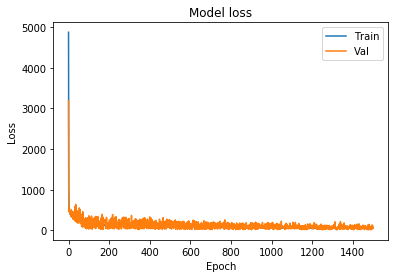

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [18]:
# serialize model to JSON
model_json = model.to_json()
with open("modelden.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelden.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
import numpy as np
from numpy import array
arr = []
for x in range(len(X_scale)):
    Xnew = array([[X_scale[x][0], X_scale[x][1] , X_scale[x][2], X_scale[x][3], X_scale[x][4], X_scale[x][5]]])
    ynew = model.predict(Xnew)
    #print(ynew[0][0])
    arr.append(ynew[0][0])
array = np.array(arr)

In [20]:
from sklearn.metrics import r2_score
r2_score(Y.tolist(), array.tolist())

0.9485800668525299